<a href="https://colab.research.google.com/github/pankajr141/Kaggle-ML/blob/master/ubi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### References
http://www.robots.ox.ac.uk/~vgg/software/via/via-1.0.6.html

https://www.analyticsvidhya.com/blog/2018/07/building-mask-r-cnn-model-detecting-damage-cars-python/


In [11]:
!pip install mrcnn

In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git "/content/drive/My Drive/datasets/models/mrcnn"
!mkdir -p "/content/drive/My Drive/datasets/models/mrcnn"

fatal: destination path '/content/drive/My Drive/datasets/models/mrcnn' already exists and is not an empty directory.


In [12]:
import os
import sys
import cv2
import copy
import matplotlib.pyplot as plt
import numpy as np
from mrcnn import utils

''' MRCNN Import '''
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.insert(0, '/content/drive/My Drive/datasets/models/mrcnn/samples/coco')
import coco

Using TensorFlow backend.


In [61]:
train_dir = '/content/drive/My Drive/datasets/ubisoft/Train'
train_files = [os.path.join(train_dir, x) for x in os.listdir(train_dir)]
train_files

['/content/drive/My Drive/datasets/ubisoft/Train/Altair 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 8.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 7.png']

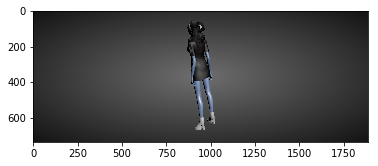

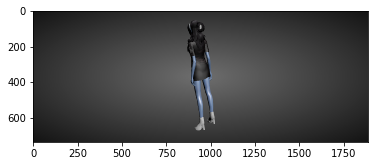

In [62]:
img_t = cv2.imread(train_files[3])
plt.imshow(img_t)
plt.show()

img_blur = cv2.blur(img_t,(5,5))
plt.imshow(img_blur)

### Background removal | RCNN Based Segmentation 

In [15]:
ROOT_DIR = '/content/drive/My Drive/datasets/ubisoft/rcnn'
!mkdir '/content/drive/My Drive/datasets/ubisoft/rcnn'

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

mkdir: cannot create directory ‘/content/drive/My Drive/datasets/ubisoft/rcnn’: File exists


In [69]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [0]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (737, 1886, 3)        min:    0.00000  max:  248.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1886.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


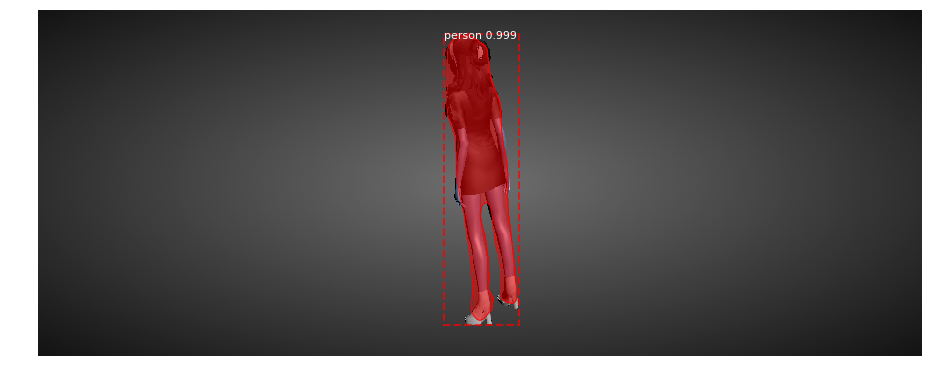

In [63]:
# Run detection
results = model.detect([img_t], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(img_t, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

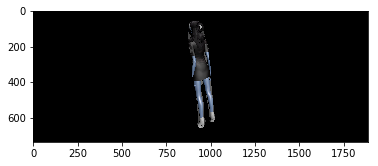

In [64]:
person_index = np.where(r['class_ids'] == 1)[0][0]
mask = r['masks'][:, :, person_index] * 1
mask = mask.astype(np.uint8)
img_t2 = cv2.bitwise_and(img_t, img_t, mask=mask)
plt.imshow(img_t2)

### Background removal | sobel filter based

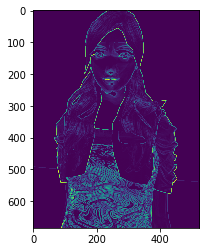

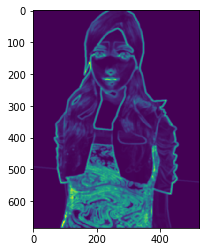

In [46]:
from skimage import filters
img_gray = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)
img_sobel = filters.sobel(img_gray)
plt.imshow(img_sobel)
plt.show()

img_blur = filters.gaussian(img_sobel, sigma=2.0)
plt.imshow(img_blur)

(684, 523)


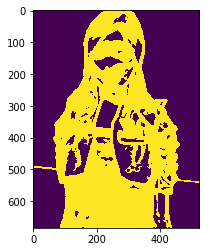

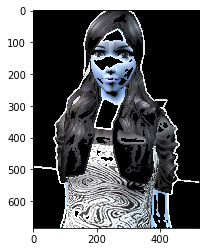

In [57]:
img_thresh = copy.deepcopy(img_blur)
img_thresh[img_blur > 0.01] = 255
# img_thresh[img_blur <= 0.001] = 0
img_thresh = img_thresh.astype(np.uint8)
print(img_thresh.shape)
plt.imshow(img_thresh)
plt.show()
connectivity = 4  
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_thresh, connectivity, cv2.CV_32S)
background_index = np.where(stats[:, cv2.CC_STAT_AREA] == np.max(stats[:, cv2.CC_STAT_AREA]))[0][0]
labels[labels != background_index] = 1
labels[labels == background_index] = 0
labels = labels.astype(np.uint8)
img_t2 = cv2.bitwise_and(img_t, img_t, mask=labels)
plt.imshow(img_t2)

### Segment the person image

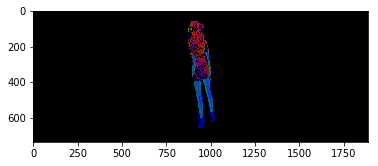

In [65]:
hsv = cv2.cvtColor(img_t2, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [0]:
from skimage import segmentation
# from skimage.segmentation import mark_boundaries

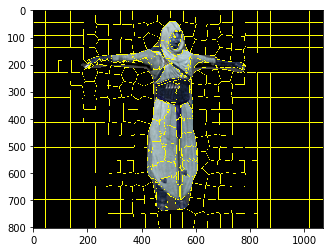

In [24]:
image_slic = segmentation.slic(img_t2, n_segments=400)
plt.imshow(segmentation.mark_boundaries(img_t2, image_slic))

52


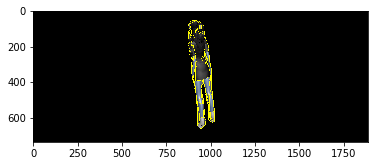

In [66]:
image_fz = segmentation.felzenszwalb(img_t2, scale=400, sigma=0.5, min_size=100)
print(np.unique(image_fz).size)
plt.imshow(segmentation.mark_boundaries(img_t2, image_fz))

124
0 (803, 1070)
(734960,)
(734960,)
[  0 127]


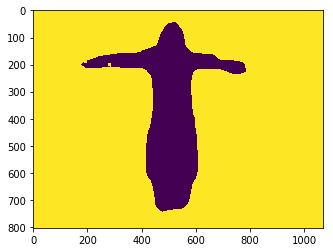

1 (803, 1070)
(1065,)
(1065,)
[  0 127]


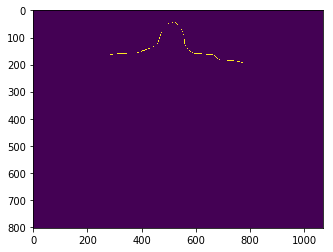

2 (803, 1070)
(121,)
(121,)
[  0 127]


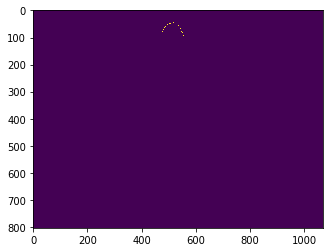

3 (803, 1070)
(672,)
(672,)
[  0 127]


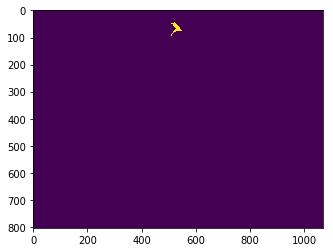

4 (803, 1070)
(3430,)
(3430,)
[  0 127]


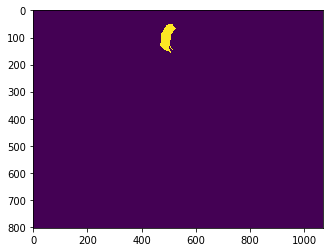

5 (803, 1070)
(1929,)
(1929,)
[  0 127]


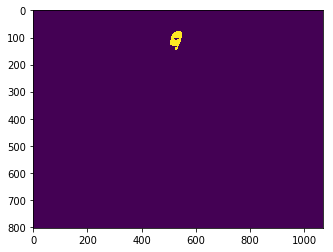

6 (803, 1070)
(705,)
(705,)
[  0 127]


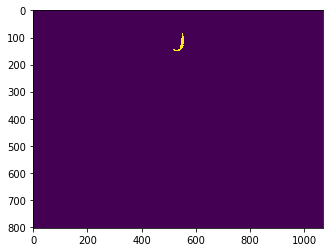

7 (803, 1070)
(354,)
(354,)
[  0 127]


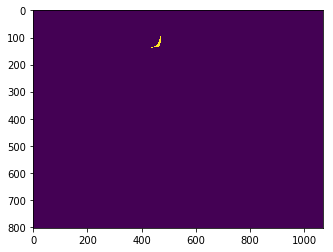

8 (803, 1070)
(106,)
(106,)
[  0 127]


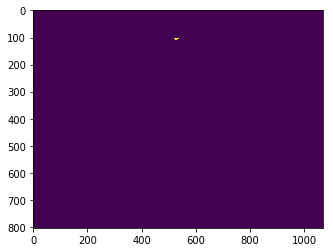

9 (803, 1070)
(146,)
(146,)
[  0 127]


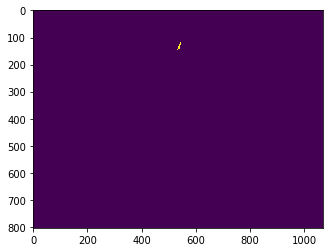

10 (803, 1070)
(303,)
(303,)
[  0 127]


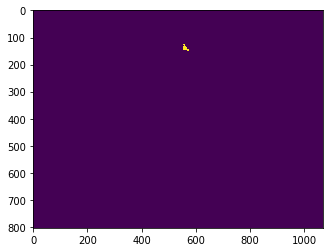

11 (803, 1070)
(170,)
(170,)
[  0 127]


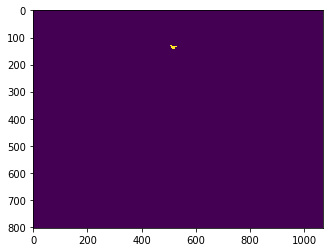

12 (803, 1070)
(626,)
(626,)
[  0 127]


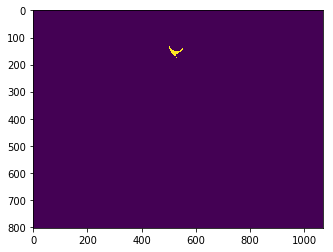

13 (803, 1070)
(935,)
(935,)
[  0 127]


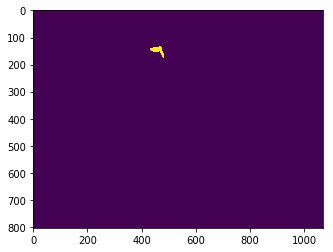

14 (803, 1070)
(1398,)
(1398,)
[  0 127]


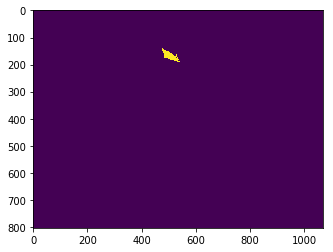

15 (803, 1070)
(618,)
(618,)
[  0 127]


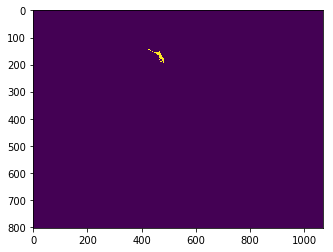

16 (803, 1070)
(5784,)
(5784,)
[  0 127]


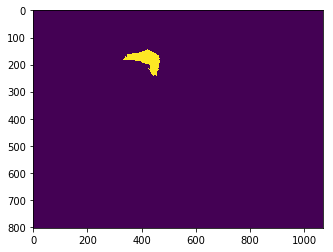

17 (803, 1070)
(3058,)
(3058,)
[  0 127]


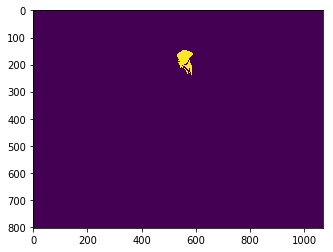

18 (803, 1070)
(149,)
(149,)
[  0 127]


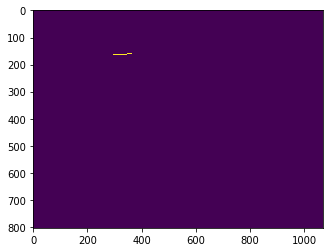

19 (803, 1070)
(2351,)
(2351,)
[  0 127]


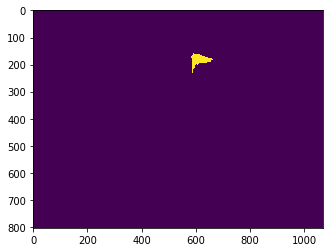

20 (803, 1070)
(482,)
(482,)
[  0 127]


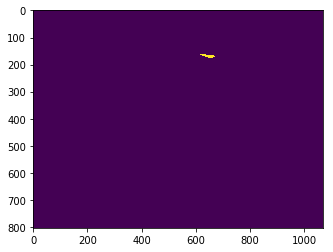

21 (803, 1070)
(1114,)
(1114,)
[  0 127]


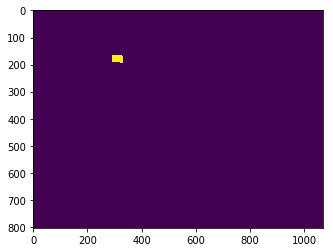

22 (803, 1070)
(205,)
(205,)
[  0 127]


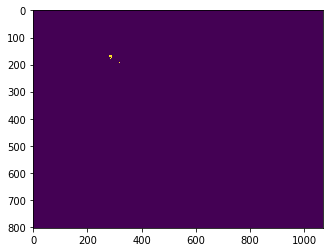

23 (803, 1070)
(173,)
(173,)
[  0 127]


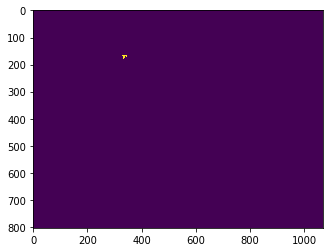

24 (803, 1070)
(230,)
(230,)
[  0 127]


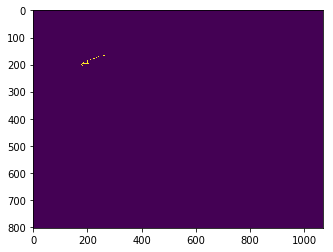

25 (803, 1070)
(551,)
(551,)
[  0 127]


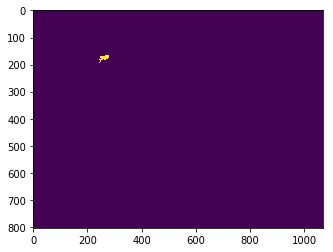

26 (803, 1070)
(1002,)
(1002,)
[  0 127]


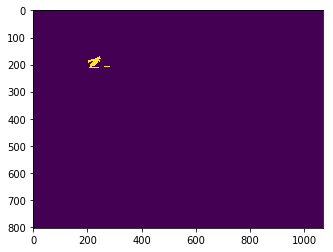

27 (803, 1070)
(276,)
(276,)
[  0 127]


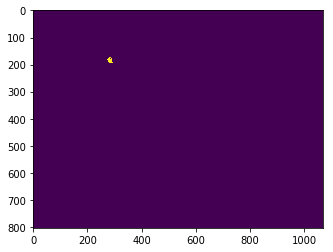

28 (803, 1070)
(297,)
(297,)
[  0 127]


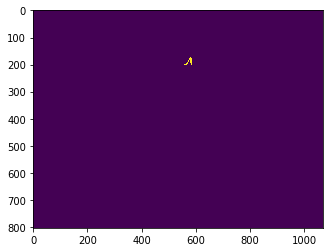

29 (803, 1070)
(103,)
(103,)
[  0 127]


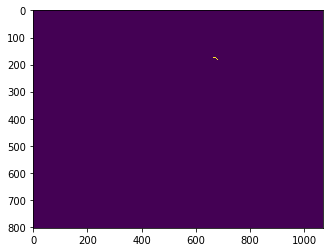

30 (803, 1070)
(579,)
(579,)
[  0 127]


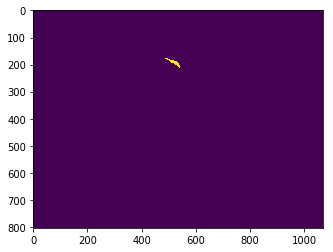

31 (803, 1070)
(496,)
(496,)
[  0 127]


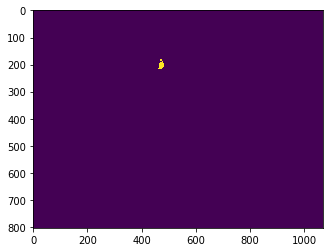

32 (803, 1070)
(389,)
(389,)
[  0 127]


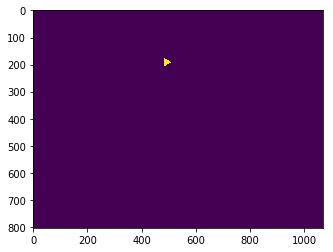

33 (803, 1070)
(345,)
(345,)
[  0 127]


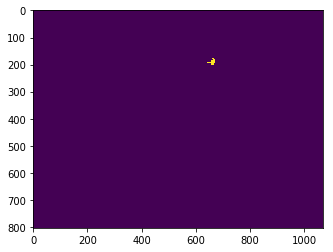

34 (803, 1070)
(2608,)
(2608,)
[  0 127]


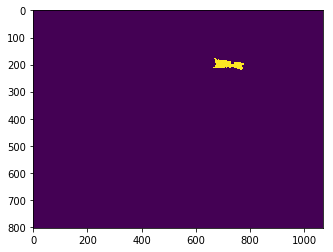

35 (803, 1070)
(2968,)
(2968,)
[  0 127]


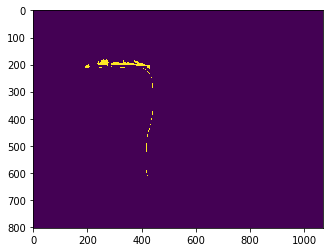

36 (803, 1070)
(338,)
(338,)
[  0 127]


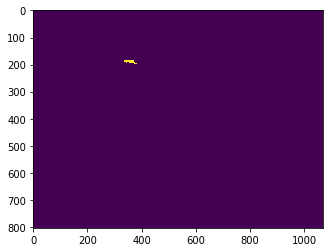

37 (803, 1070)
(155,)
(155,)
[  0 127]


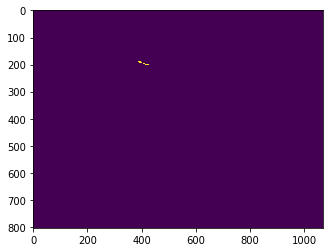

38 (803, 1070)
(150,)
(150,)
[  0 127]


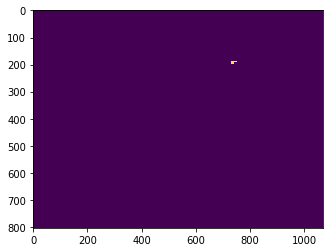

39 (803, 1070)
(114,)
(114,)
[  0 127]


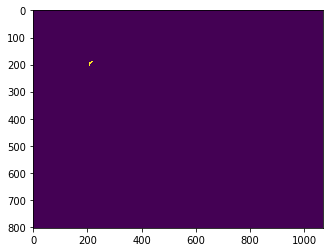

40 (803, 1070)
(139,)
(139,)
[  0 127]


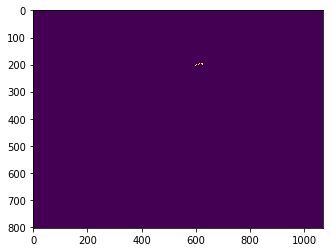

41 (803, 1070)
(133,)
(133,)
[  0 127]


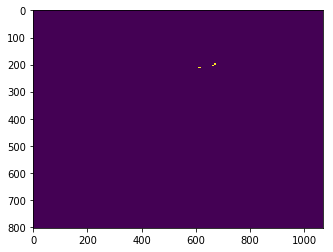

42 (803, 1070)
(891,)
(891,)
[  0 127]


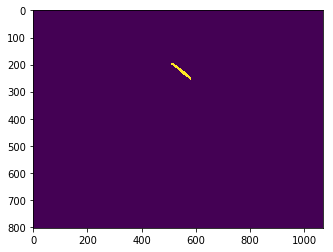

43 (803, 1070)
(750,)
(750,)
[  0 127]


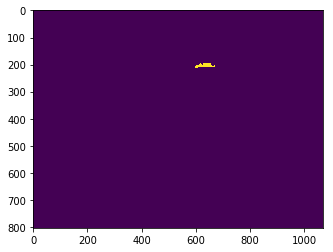

44 (803, 1070)
(149,)
(149,)
[  0 127]


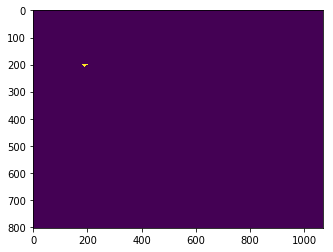

45 (803, 1070)
(2243,)
(2243,)
[  0 127]


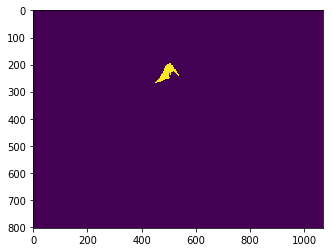

46 (803, 1070)
(141,)
(141,)
[  0 127]


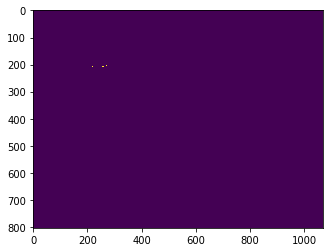

47 (803, 1070)
(389,)
(389,)
[  0 127]


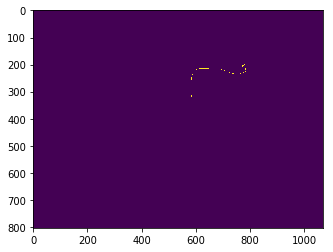

48 (803, 1070)
(308,)
(308,)
[  0 127]


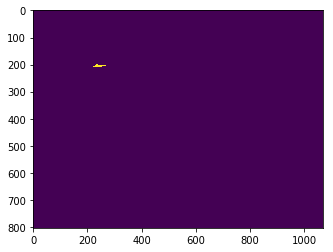

49 (803, 1070)
(483,)
(483,)
[  0 127]


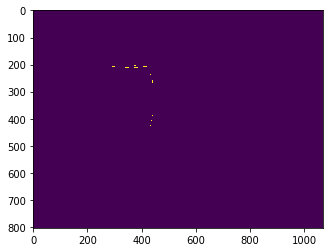

50 (803, 1070)
(419,)
(419,)
[  0 127]


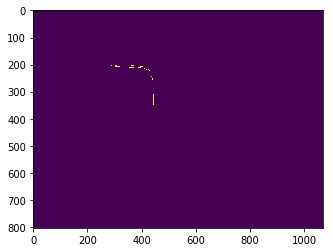

51 (803, 1070)
(355,)
(355,)
[  0 127]


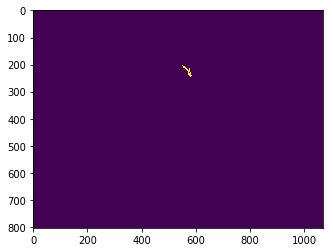

52 (803, 1070)
(1246,)
(1246,)
[  0 127]


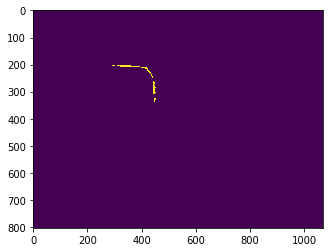

53 (803, 1070)
(224,)
(224,)
[  0 127]


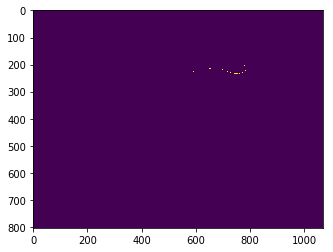

54 (803, 1070)
(346,)
(346,)
[  0 127]


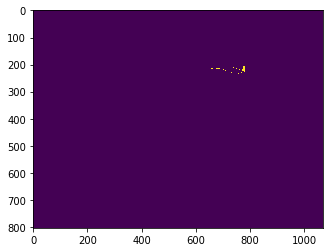

55 (803, 1070)
(673,)
(673,)
[  0 127]


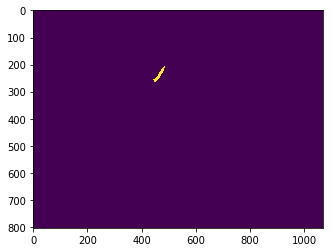

56 (803, 1070)
(177,)
(177,)
[  0 127]


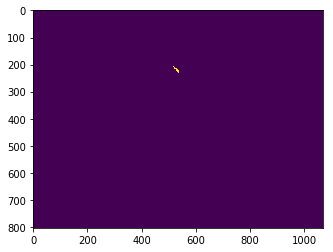

57 (803, 1070)
(125,)
(125,)
[  0 127]


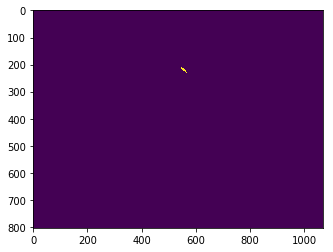

58 (803, 1070)
(247,)
(247,)
[  0 127]


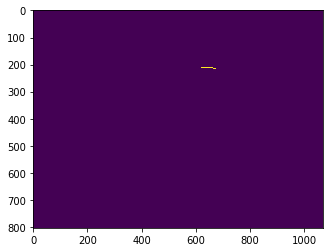

59 (803, 1070)
(1088,)
(1088,)
[  0 127]


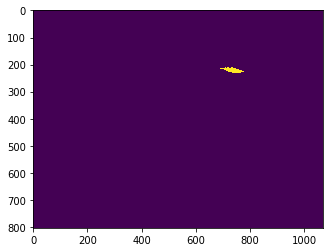

60 (803, 1070)
(146,)
(146,)
[  0 127]


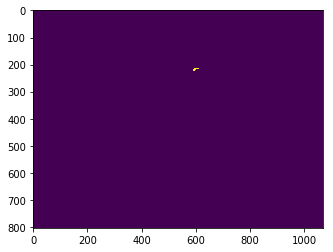

61 (803, 1070)
(228,)
(228,)
[  0 127]


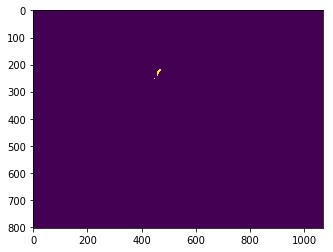

62 (803, 1070)
(606,)
(606,)
[  0 127]


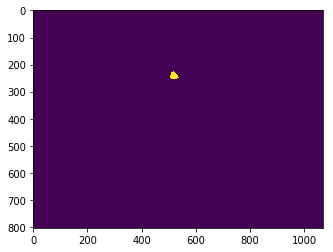

63 (803, 1070)
(407,)
(407,)
[  0 127]


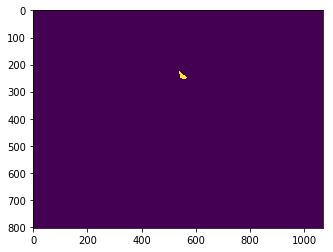

64 (803, 1070)
(192,)
(192,)
[  0 127]


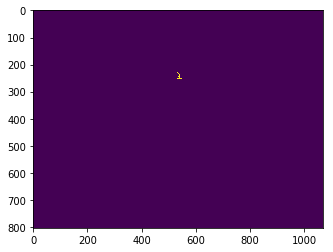

65 (803, 1070)
(140,)
(140,)
[  0 127]


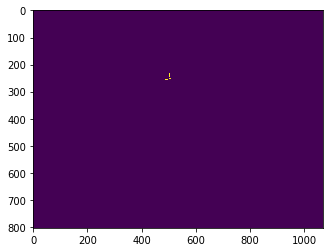

66 (803, 1070)
(202,)
(202,)
[  0 127]


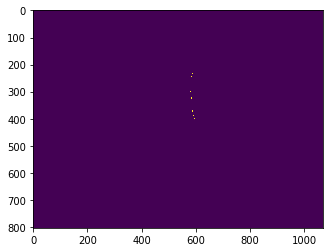

67 (803, 1070)
(396,)
(396,)
[  0 127]


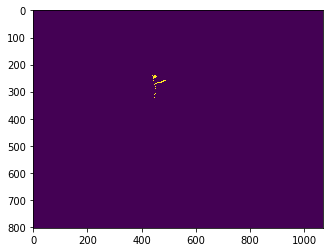

68 (803, 1070)
(106,)
(106,)
[  0 127]


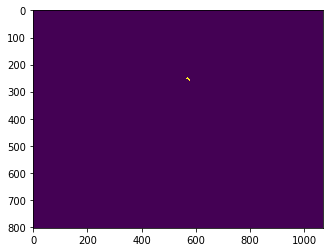

69 (803, 1070)
(8468,)
(8468,)
[  0 127]


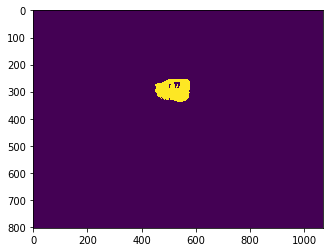

70 (803, 1070)
(116,)
(116,)
[  0 127]


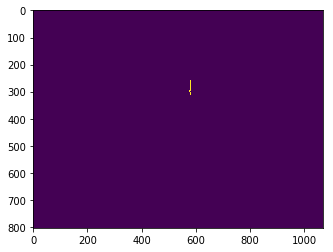

71 (803, 1070)
(358,)
(358,)
[  0 127]


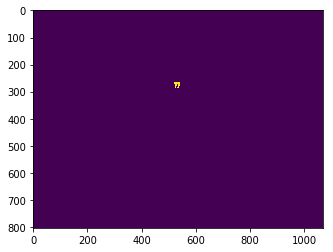

72 (803, 1070)
(107,)
(107,)
[  0 127]


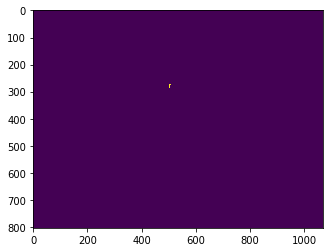

73 (803, 1070)
(338,)
(338,)
[  0 127]


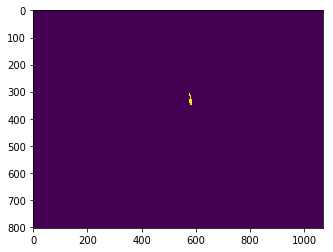

74 (803, 1070)
(319,)
(319,)
[  0 127]


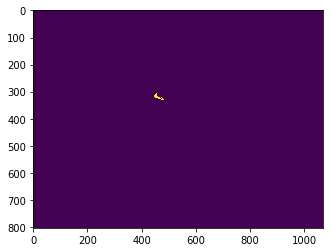

75 (803, 1070)
(225,)
(225,)
[  0 127]


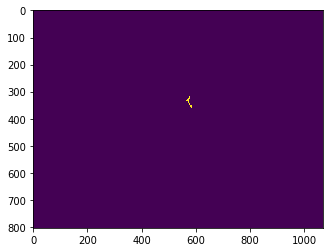

76 (803, 1070)
(102,)
(102,)
[  0 127]


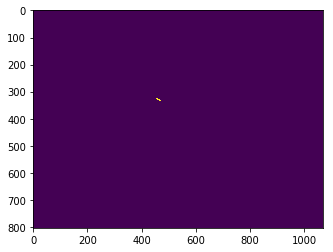

77 (803, 1070)
(133,)
(133,)
[  0 127]


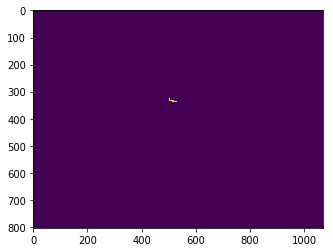

78 (803, 1070)
(28869,)
(28869,)
[  0 127]


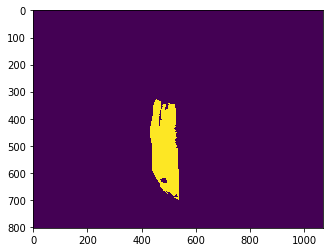

79 (803, 1070)
(861,)
(861,)
[  0 127]


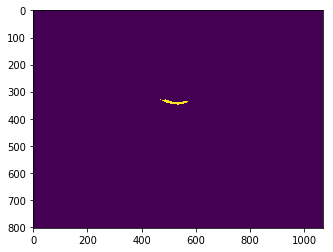

80 (803, 1070)
(372,)
(372,)
[  0 127]


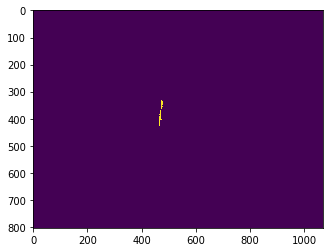

81 (803, 1070)
(306,)
(306,)
[  0 127]


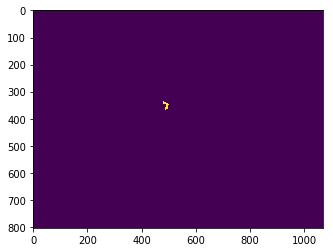

82 (803, 1070)
(104,)
(104,)
[  0 127]


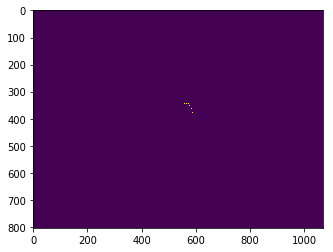

83 (803, 1070)
(2383,)
(2383,)
[  0 127]


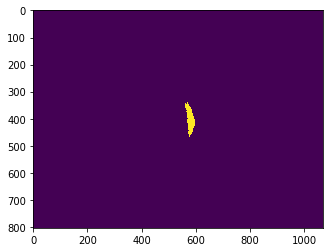

84 (803, 1070)
(1125,)
(1125,)
[  0 127]


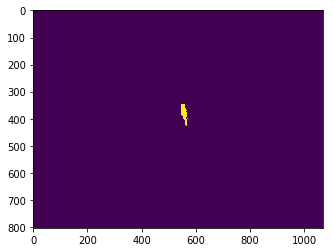

85 (803, 1070)
(211,)
(211,)
[  0 127]


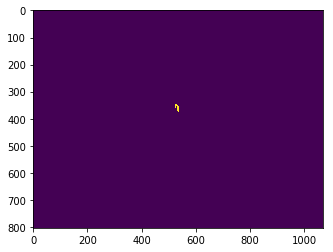

86 (803, 1070)
(2007,)
(2007,)
[  0 127]


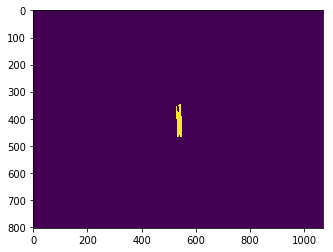

87 (803, 1070)
(507,)
(507,)
[  0 127]


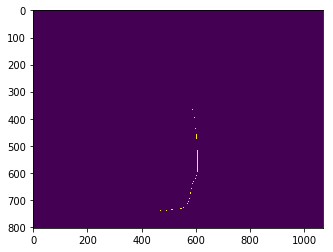

88 (803, 1070)
(11864,)
(11864,)
[  0 127]


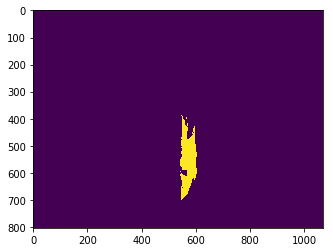

89 (803, 1070)
(140,)
(140,)
[  0 127]


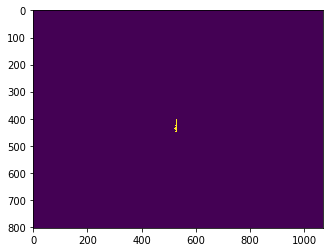

90 (803, 1070)
(255,)
(255,)
[  0 127]


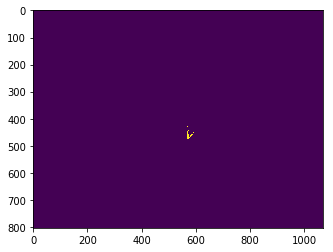

91 (803, 1070)
(178,)
(178,)
[  0 127]


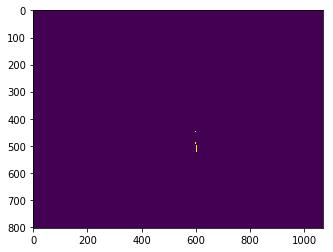

92 (803, 1070)
(103,)
(103,)
[  0 127]


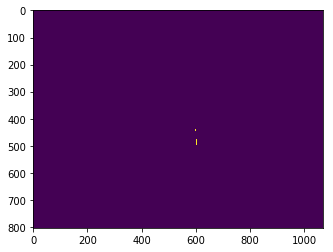

93 (803, 1070)
(187,)
(187,)
[  0 127]


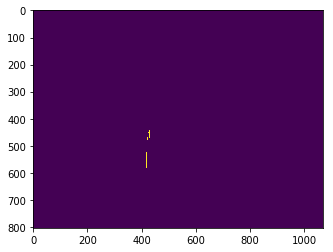

94 (803, 1070)
(152,)
(152,)
[  0 127]


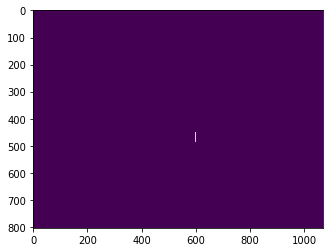

95 (803, 1070)
(625,)
(625,)
[  0 127]


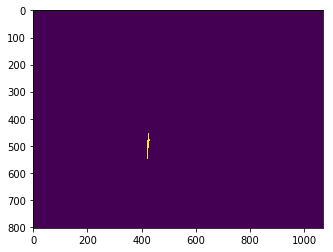

96 (803, 1070)
(296,)
(296,)
[  0 127]


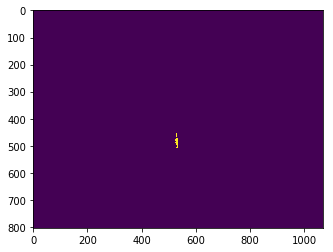

97 (803, 1070)
(105,)
(105,)
[  0 127]


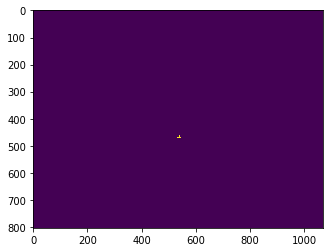

98 (803, 1070)
(690,)
(690,)
[  0 127]


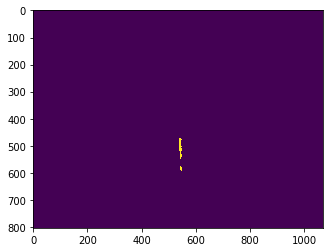

99 (803, 1070)
(1975,)
(1975,)
[  0 127]


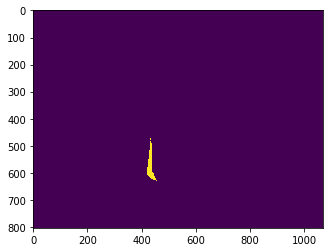

100 (803, 1070)
(659,)
(659,)
[  0 127]


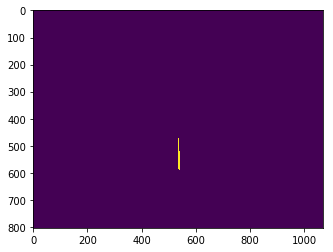

101 (803, 1070)
(105,)
(105,)
[  0 127]


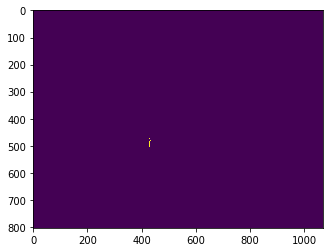

102 (803, 1070)
(325,)
(325,)
[  0 127]


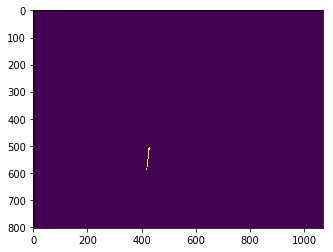

103 (803, 1070)
(178,)
(178,)
[  0 127]


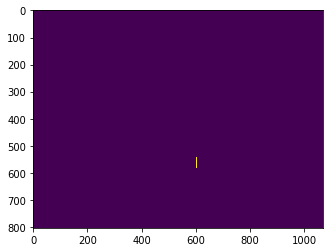

104 (803, 1070)
(153,)
(153,)
[  0 127]


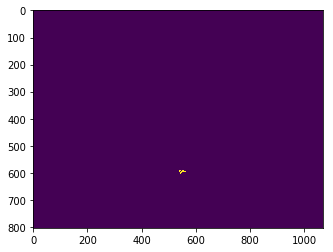

105 (803, 1070)
(265,)
(265,)
[  0 127]


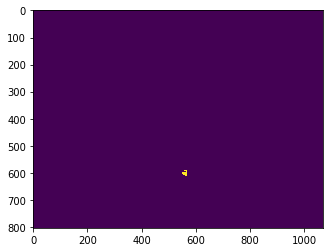

106 (803, 1070)
(227,)
(227,)
[  0 127]


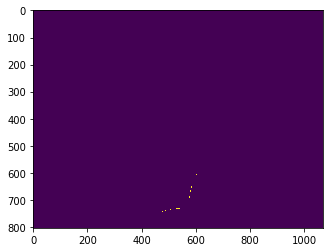

107 (803, 1070)
(197,)
(197,)
[  0 127]


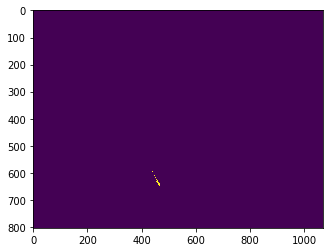

108 (803, 1070)
(578,)
(578,)
[  0 127]


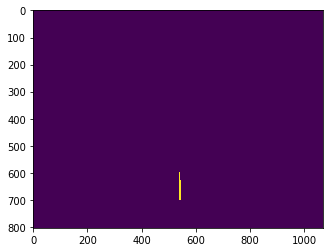

109 (803, 1070)
(237,)
(237,)
[  0 127]


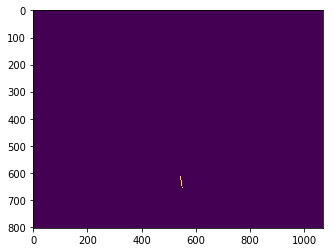

110 (803, 1070)
(124,)
(124,)
[  0 127]


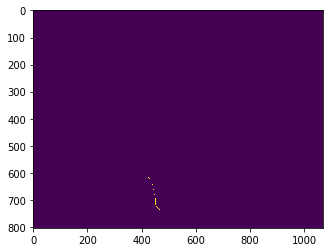

111 (803, 1070)
(116,)
(116,)
[  0 127]


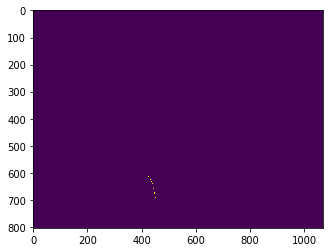

112 (803, 1070)
(123,)
(123,)
[  0 127]


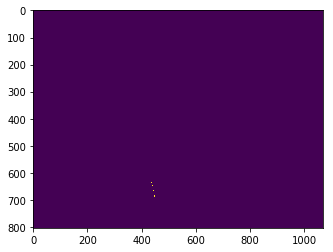

113 (803, 1070)
(706,)
(706,)
[  0 127]


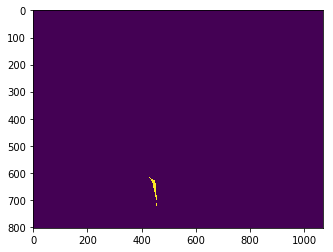

114 (803, 1070)
(369,)
(369,)
[  0 127]


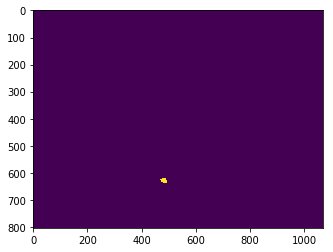

115 (803, 1070)
(260,)
(260,)
[  0 127]


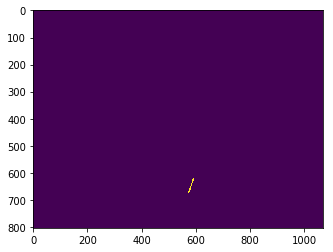

116 (803, 1070)
(2492,)
(2492,)
[  0 127]


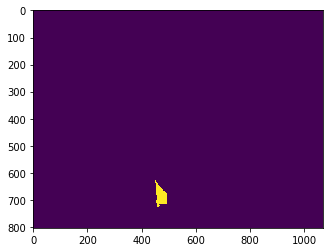

117 (803, 1070)
(330,)
(330,)
[  0 127]


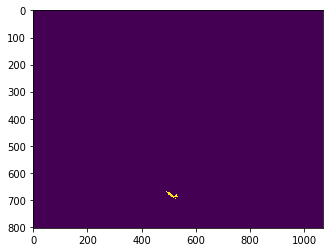

118 (803, 1070)
(458,)
(458,)
[  0 127]


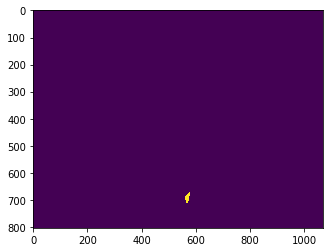

119 (803, 1070)
(163,)
(163,)
[  0 127]


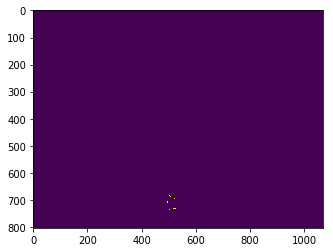

120 (803, 1070)
(1384,)
(1384,)
[  0 127]


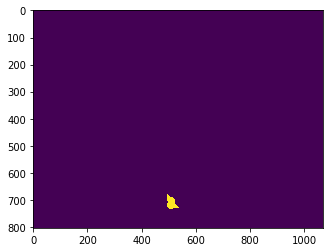

121 (803, 1070)
(650,)
(650,)
[  0 127]


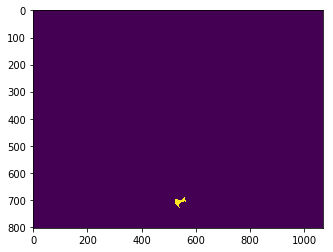

122 (803, 1070)
(492,)
(492,)
[  0 127]


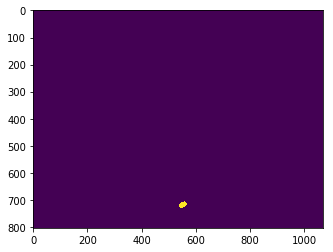

123 (803, 1070)
(734,)
(734,)
[  0 127]


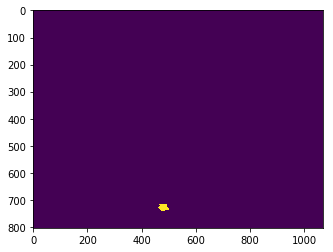

In [41]:
print(np.unique(image_fz).size)
import copy
for un in np.unique(image_fz):
    image_fz_t = copy.deepcopy(image_fz)
    print(un, image_fz_t.shape)
    print(image_fz_t[image_fz_t == un].shape)
    image_fz_t[image_fz_t != un] = -1
    image_fz_t[image_fz_t == un] = 127
    image_fz_t[image_fz_t == -1] = 0
    print(image_fz_t[image_fz_t == 127].shape)
    print(np.unique(image_fz_t))
    plt.imshow(image_fz_t)
    plt.show()